In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

In [3]:
heroes = pd.read_csv('F:\Kaggle\heroes_information.csv')
heroes.head(10)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


In [4]:
Powers = pd.read_csv('F:\Kaggle\super_hero_powers.csv')
Powers.head(10)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Abraxas,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,Absorbing Man,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,Adam Monroe,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,Adam Strange,False,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
9,Agent Bob,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
Unnamed: 0    734 non-null int64
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.1+ KB


In [6]:
heroes.isnull().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [7]:
heroes['Publisher'].value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
Icon Comics            4
ABC Studios            4
IDW Publishing         4
Shueisha               4
Wildstorm              3
Sony Pictures          2
J. R. R. Tolkien       1
Hanna-Barbera          1
South Park             1
Titan Books            1
Microsoft              1
J. K. Rowling          1
Universal Studios      1
Rebellion              1
Name: Publisher, dtype: int64

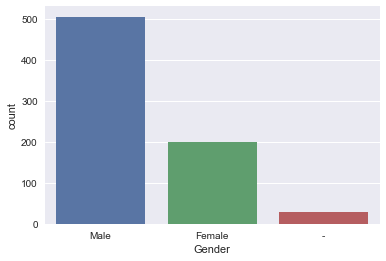

In [8]:
sns.countplot(x='Gender', data = heroes)

In [9]:
heroes.replace(to_replace='-',value='Other',inplace= True)
heroes['Publisher'].fillna('Other', inplace= True)

In [10]:
heroes.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
heroes['Weight'].value_counts()

-99.0     237
 79.0      23
 54.0      23
 81.0      22
 90.0      19
 52.0      15
 86.0      15
 59.0      14
 56.0      13
 77.0      13
 61.0      13
 101.0     12
 50.0      12
 88.0      11
 63.0      11
 83.0      10
 95.0      10
 74.0      10
 65.0       9
 72.0       8
 68.0       8
 104.0      8
 135.0      8
 57.0       7
 97.0       7
 99.0       7
 117.0      6
 108.0      6
 55.0       5
 70.0       5
         ... 
 14.0       1
 356.0      1
 105.0      1
 324.0      1
 360.0      1
 236.0      1
 36.0       1
 140.0      1
 128.0      1
 248.0      1
 16.0       1
 45.0       1
 234.0      1
 96.0       1
 82.0       1
 76.0       1
 198.0      1
 116.0      1
 176.0      1
 170.0      1
 47.0       1
 78.0       1
 27.0       1
 25.0       1
 178.0      1
 132.0      1
 38.0       1
 412.0      1
 320.0      1
 855.0      1
Name: Weight, Length: 135, dtype: int64

In [12]:
heroes['Height'].value_counts()

-99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
 185.0     35
 175.0     34
 168.0     29
 170.0     26
 165.0     26
 191.0     21
 193.0     21
 198.0     18
 173.0     17
 201.0     11
 196.0     11
 163.0      8
 213.0      7
 203.0      5
 211.0      5
 157.0      5
 244.0      4
 229.0      3
 155.0      3
 218.0      3
 226.0      3
 122.0      2
 206.0      2
 279.0      2
 366.0      2
 137.0      2
 30.5       2
 305.0      2
 61.0       1
 975.0      1
 142.0      1
 287.0      1
 267.0      1
 304.8      1
 701.0      1
 876.0      1
 259.0      1
 15.2       1
 297.0      1
 257.0      1
 62.5       1
 66.0       1
 160.0      1
 140.0      1
 234.0      1
 71.0       1
 79.0       1
 108.0      1
 64.0       1
Name: Height, dtype: int64

In [13]:
temp_series = heroes['Publisher'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Comic-wise Superheroes distribution',
    width=900,
    height=900,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Comic")

In [14]:
labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500,2500,1053,500]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

In [15]:
Powers=Powers*1 # converting the true and false power
Powers.head(10)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Abraxas,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,Absorbing Man,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,Adam Monroe,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Adam Strange,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Agent Bob,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
Powers.loc[:,'no_of_powers'] = Powers.iloc[:,1:].sum(axis=1)
Powers.head(10)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,no_of_powers
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
5,Abraxas,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,14
6,Absorbing Man,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,11
7,Adam Monroe,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,Adam Strange,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,10
9,Agent Bob,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
all_powerful_heroes=Powers[['hero_names','no_of_powers']]

In [18]:
all_powerful_heroes=all_powerful_heroes.sort_values('no_of_powers',ascending=False)

In [19]:
all_powerful_heroes.head(10)

,hero_names,no_of_powers
563,Spectre,49
18,Amazo,44
394,Martian Manhunter,35
370,Living Tribunal,35
388,Man of Miracles,34
139,Captain Marvel,33
597,T-X,33
246,Galactus,32
594,T-1000,32
455,One-Above-All,31


In [20]:
trace = go.Bar(
    x=Powers['hero_names'],
    y=Powers['no_of_powers'],
    text=['names','no_of_powers']
)

layout = go.Layout(
    title='most powerfull superhero',
    barmode='bar'
)

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename='most-powerfull-superhero')

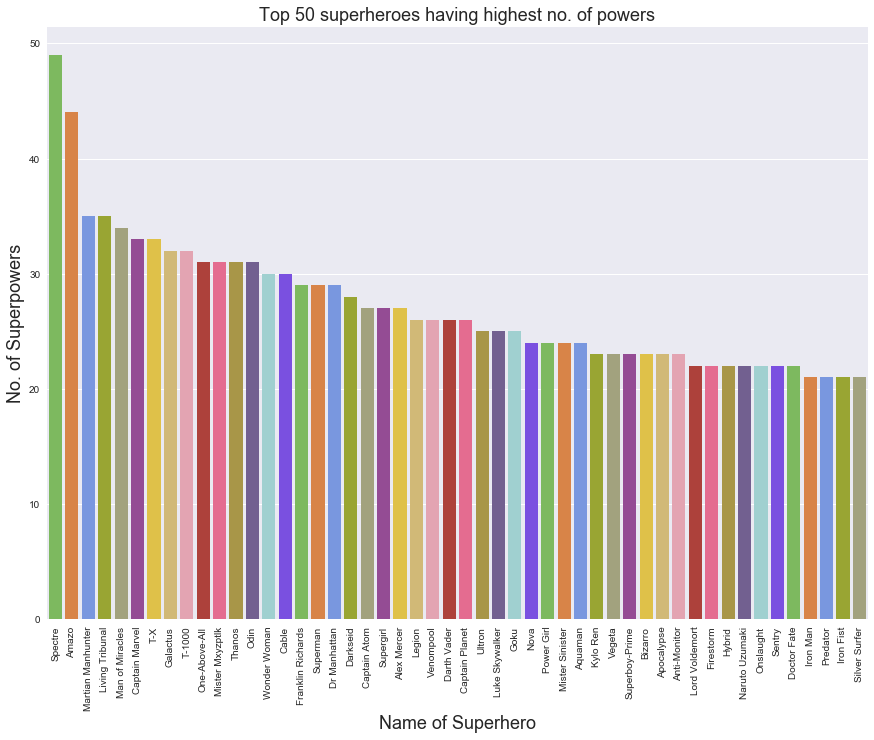

In [21]:
type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

fig, ax= plt.subplots()

fig.set_size_inches(14.7,10.9)


sns.set_context("paper", font_scale=1.5)
f=sns.barplot(x=all_powerful_heroes["hero_names"].head(50),
y=all_powerful_heroes['no_of_powers'].head(50),
data=all_powerful_heroes,palette=type_colors)
f.set_xlabel("Name of Superhero",fontsize=18)
f.set_ylabel("No. of Superpowers",fontsize=18)
f.set_title("Top 50 superheroes having highest no. of powers",fontsize=18)
for item in f.get_xticklabels():
    item.set_rotation(90)

In [22]:
count_srs=heroes['Gender'].value_counts().head()
trace=go.Bar(

        y=count_srs.index[::-1],
        x=count_srs.values[::-1],
        orientation ='h',
        marker=dict(
            color=count_srs.values[::-1],
        colorscale= 'Blues',
        reversescale= True
        ),
)
layout= dict(
        title='Gender Distribution Of Superheroes',
        )
data=[trace]
fig=go.Figure(data=data,layout=layout)

py.iplot(fig,filename='Superheroes',)

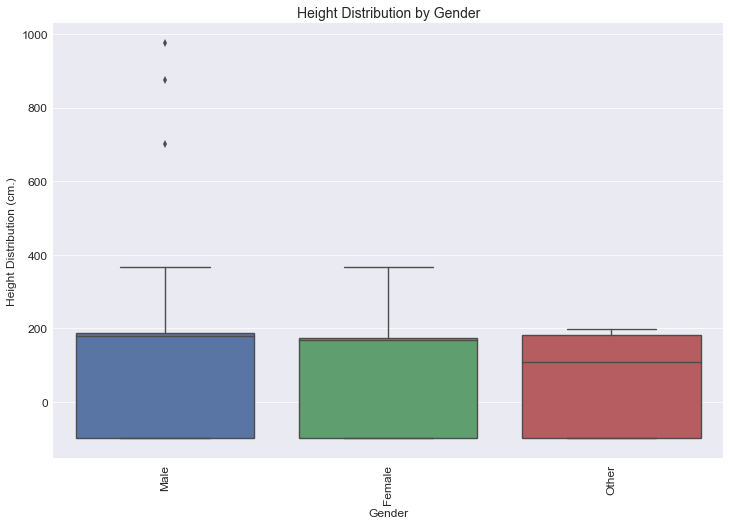

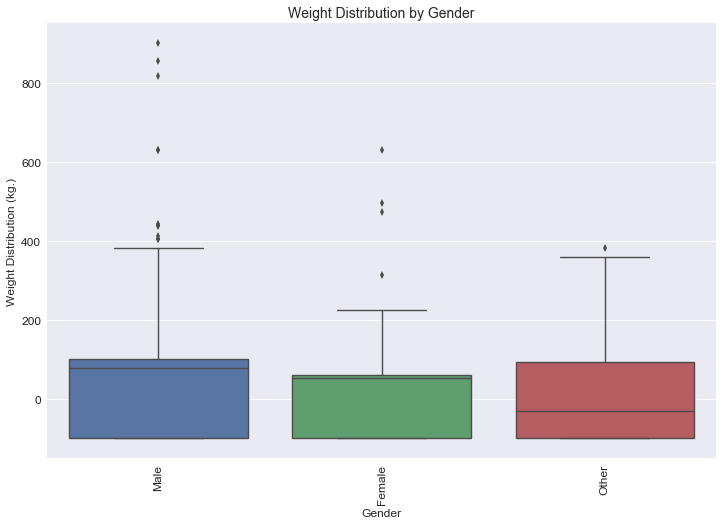

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Gender", y="Height", data=heroes)
plt.ylabel('Height Distribution (cm.)', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.title("Height Distribution by Gender", fontsize=14)
plt.xticks(rotation='vertical')
plt.show()


plt.figure(figsize=(12,8))
sns.boxplot(x="Gender", y="Weight", data=heroes)
plt.ylabel('Weight Distribution (kg.)', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.title("Weight Distribution by Gender", fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

In [24]:
Powers_alignment1=heroes.ix[heroes['Gender']=='Male']
count_srs=Powers_alignment1['Alignment'].value_counts()

trace=go.Bar(
    x=count_srs.index,
    y=count_srs.values,
    marker=dict(
        color=count_srs.values,
        colorscale='Picnic',
        reversescale=True,
    )
)

layout=go.Layout(
    title='Alignment of Male Superheroes'
)
data=[trace]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig, filename="Alignment 1")


Powers_alignment2=heroes.ix[heroes['Gender']=='Female']
count_srs=Powers_alignment2['Alignment'].value_counts()

trace=go.Bar(
    x=count_srs.index,
    y=count_srs.values,
    marker=dict(
        color=count_srs.values,
        colorscale='Picnic',
        reversescale=True,
    )
)

layout=go.Layout(
    title='Alignment of Female Superheroes'
)
data=[trace]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig, filename="Alignment 2")

In [25]:
cnt_srs = heroes['Race'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="red",
        colorscale = 'red',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Race Type of Superheroes'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Race")  

In [26]:
type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

temp_series=heroes.ix[heroes['Skin color']!='Other']['Skin color'].value_counts()
labels=(np.array(temp_series.index))
sizes=(np.array((temp_series / temp_series.sum())*100))

trace=go.Pie(labels=labels, values=sizes,
            hoverinfo='label+percent',textinfo='value',
            textfont=dict(size=20),
            marker=dict(colors=type_colors,
                       line=dict(color='black',width=2)))

layout=go.Layout(
        title="Skin Distribution of superheroes",
    width=1000,
    height=1000,
)
data=[trace]
fig=go.Figure(data=data, layout=layout)
py.iplot(fig, filename="skin")


#now for the eye color

temp_series=heroes.ix[heroes['Eye color']!='Other']['Eye color'].value_counts()
labels=(np.array(temp_series.index))
sizes=(np.array((temp_series / temp_series.sum())*100))

trace=go.Pie(labels=labels, values=sizes,
            hoverinfo='label+percent',textinfo='value',
            textfont=dict(size=20),
            marker=dict(colors=type_colors,
                       line=dict(color='black',width=2)))

layout=go.Layout(
        title="Skin Distribution of superheroes",
    width=1000,
    height=1000,
)
data=[trace]
fig=go.Figure(data=data, layout=layout)
py.iplot(fig, filename="skin")


temp_series=heroes.ix[heroes['Hair color']!='No Hair']['Hair color'].value_counts()
labels=(np.array(temp_series.index))
sizes=(np.array((temp_series / temp_series.sum())*100))

trace=go.Pie(labels=labels, values=sizes,
            hoverinfo='label+percent',textinfo='value',
            textfont=dict(size=20),
            marker=dict(colors=type_colors,
                       line=dict(color='black',width=2)))

layout=go.Layout(
        title="Hair color Distribution of superheroes",
    width=1000,
    height=1000,
)
data=[trace]
fig=go.Figure(data=data, layout=layout)
py.iplot(fig, filename="skin")


In [27]:
heroes['hair']=np.where(heroes["Hair color"]=="No Hair", "Bald","Non-Balded")

In [28]:
count_srs=heroes['hair'].value_counts()

trace=go.Bar(
    y=count_srs.index[::-1],
    x=count_srs.values[::-1],
    orientation='h',
    marker=dict(
        color=count_srs.values[::-1],
        colorscale='pink',
        reversescale=True
    ),
)

layout = dict(
    title='How many Superheroes are bald?',
)
data=[trace]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig,filename='Hair')

In [29]:
Powers.loc[:,'total_powers'] = Powers.iloc[:, 1:].sum(axis=1)
Powers.head(2)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,no_of_powers,total_powers
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,8
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,7,14


In [30]:
df = Powers.drop(['hero_names'], axis=1)

df2 = pd.DataFrame()
for col in list(df.columns):
    df2[col] = df[col].value_counts()
df2.drop(['total_powers'], axis=1, inplace=True)
df2 = df2.T
df2.drop([0], axis=1, inplace=True)

In [31]:
df2.sort_values(1, ascending=False)
df2.rename(columns={1: 'total_heroes'}, inplace=True)

In [32]:
df2.sort_values('total_heroes', ascending=False, inplace=True)
df2['super_power']=df2.index

In [33]:
trace = go.Bar(
    x=np.array(df2['super_power'].loc[df2['total_heroes']>75]),
    y=np.array(df2['total_heroes'].loc[df2['total_heroes']>75])
)
layout = go.Layout(
    title='most common super powers',
    barmode='bar'
)

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename='most common super powers')